## **Water Quality Data Analysis**
### **ENERES 131: Final Project Fall 2024**
Team Members: Nidhi Nayak, Vishali Kirthi Vallioor, Damaris Arteaga, Timothy Zheng

![Water Quality](https://plus.unsplash.com/premium_photo-1710628263718-367b1cf5828f?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

---

## **Table of Contents and Deliverables**

1. <a href="#abstract" style="color:purple;"><b>Section 1:</b> Abstract</a>

2. <a href="#project-background" style="color:purple;"><b>Section 2:</b> Project Background</a>

3. <a href="#project-objective" style="color:purple;"><b>Section 3:</b> Project Objective</a>

4. <a href="#input-data-description" style="color:purple;"><b>Section 4:</b> Input Data Description</a>
   - <a href="#step-1-imports-and-necessary-installs" style="color:purple;">Step 1: Imports and Necessary Installs</a>
   - <a href="#step-2-actual-dataset" style="color:purple;">Step 2: Actual Dataset</a>

5. <a href="#data-cleaning" style="color:purple;"><b>Section 5:</b> Data Cleaning</a>
   - <a href="#step-1-dropping-nas-merging-with-other-datasets-and-ensuring-proper-data-types" style="color:purple;">Step 1: Dropping NAs, Merging with Other Datasets, and Ensuring Proper Data Types</a>
   - <a href="#step-2-unit-consistency" style="color:purple;">Step 2: Unit Consistency</a>
   - <a href="#step-3-time-zone-consistency" style="color:purple;">Step 3: Time Zone Consistency</a>
   - <a href="#step-4-feature-engineering" style="color:purple;">Step 4: Feature Engineering</a>
   - <a href="#step-5-pivoting-for-each-prediction-approach" style="color:purple;">Step 5: Pivoting for Each Prediction Approach</a>
     - <a href="#substep-1-biological-dataframe" style="color:purple;">Substep 1: Biological Dataframe</a>
     - <a href="#substep-2-water-quality-dataframe" style="color:purple;">Substep 2: Water Quality DataFrame</a>
     - <a href="#substep-3-do-dataframe" style="color:purple;">Substep 3: DO Dataframe</a>

6. <a href="#eda" style="color:purple;"><b>Section 6:</b> Data Summary and Exploratory Data Analysis</a>
   - <a href="#part-1-do-eda" style="color:purple;">Part 1: DO EDA</a>

7. <a href="#forecasting-modeling" style="color:purple;"><b>Section 7:</b> Forecasting and Prediction Modeling</a>
   - <a href="#core-prediction" style="color:purple;"><b>Subsection 7.1:</b> Core Prediction Question</a>
   - <a href="#supporting-prediction" style="color:purple;"><b>Subsection 7.2:</b> Supporting Question</a>
     - <a href="#part-1-missing-value-imputation-interpolation" style="color:purple;">Part 1: Missing Value Imputation/Interpolation</a>
     - <a href="#part-2-train-test-split" style="color:purple;">Part 2: Train-Test Split</a>
     - <a href="#part-3-models" style="color:purple;">Part 3: Models</a>
       - <a href="#model-1-linear-regression" style="color:purple;">Model 1: Linear Regression</a>
       - <a href="#model-2-xgboost" style="color:purple;">Model 2: XGBoost</a>
       - <a href="#model-3-random-forest" style="color:purple;">Model 3: Random Forest</a>
     - <a href="#part-4-evaluation-visualization" style="color:purple;">Part 4: Evaluation & Visualization</a>
   - <a href="#temporal-prediction" style="color:purple;"><b>Subsection 7.3:</b> Temporal Prediction Question</a>

8. <a href="#conclusions" style="color:purple;"><b>Section 8:</b> Interpretation and Conclusions</a>

9. <a href="#references" style="color:purple;"><b>Section 9:</b> References</a>


---

## <a id="abstract"></a>Section 1: Abstract

---

## <a id="project-background"></a>Section 2: Project Background

---

## <a id="project-objective"></a>Section 3: Project Objective


---

## <a id="input-data-description"></a>Section 4: Input Data Description

### <a id="step-1-imports-and-necessary-installs"></a>Step 1: Imports and Necessary Installs

Run the following cell to install and import all required libraries.

In [52]:
# Run the following cell for all imports/libraries.

!pip install xgboost
import pandas as pd
import zipfile
import zipfile
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

### <a id="step-2-actual-dataset"></a>Step 2: Actual Dataset

** Include description of WQ Data portal**

In [3]:
# We employ the following Zipfile code to load a massive biological result zip dataset. The dataset is very massive, so we zipped it.

zip_file_path = "final_data/biologicalresult2.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df_bio_metadata = pd.read_csv(f, low_memory=False)

filtered_df_bio = df_bio_metadata[[
    "OrganizationIdentifier", 
    "ActivityIdentifier",
    "ActivityStartDate", 
    "ActivityStartTime/Time",	
    "ActivityStartTime/TimeZoneCode",
    "ActivityEndDate", 
    "CharacteristicName", 
    "ResultMeasureValue",
    "ResultMeasure/MeasureUnitCode", 
    "MeasureQualifierCode",
    "ResultStatusIdentifier",
    "ProjectIdentifier",
    "MonitoringLocationIdentifier"
    
]]

filtered_df_bio.head()

,OrganizationIdentifier,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,ProjectIdentifier,MonitoringLocationIdentifier
0,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Stream width measure,60.0,ft,NaN,Accepted,NaN,USGS-11176900
1,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Temperature, water",11.4,deg C,NaN,Accepted,NaN,USGS-11176900
2,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Stream flow, instantaneous",201,ft3/s,NaN,Accepted,NaN,USGS-11176900
3,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Number of sampling points,20,count,NaN,Accepted,NaN,USGS-11176900
4,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Height, gage",2.81,ft,NaN,Accepted,NaN,USGS-11176900


In [4]:
zip_file_path = "final_data/project2.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df_project = pd.read_csv(f, low_memory=False)

df_project.head()

,OrganizationIdentifier,OrganizationFormalName,ProjectIdentifier,ProjectName,ProjectDescriptionText,SamplingDesignTypeCode,QAPPApprovedIndicator,QAPPApprovalAgencyName,ProjectFileUrl,ProjectMonitoringLocationWeightingUrl
0,CEDEN,California State Water Resources Control Board,RWB2_TMDL_HMB_2020,RWB2 Half Moon Bay Pathogen TMDL Study 2020,RWB2 Half Moon Bay Pathogen TMDL Study 2020,NaN,NaN,NaN,NaN,NaN
1,CEDEN,California State Water Resources Control Board,RWB2_TMDL_HMB_2019,RWB2 Half Moon Bay Pathogen TMDL Study 2019,RWB2 Half Moon Bay Pathogen TMDL Study 2019,NaN,NaN,NaN,NaN,NaN
2,21CABCH,Southern California Coastal Water Research Pro...,CA253340,Crissy Field,Ocean Reach Conducted in 2014,NaN,NaN,NaN,NaN,NaN
3,21CABCH,Southern California Coastal Water Research Pro...,CA199513,Aquatic Park,Ocean Reach Conducted in 2014,NaN,NaN,NaN,NaN,NaN
4,21CABCH,Southern California Coastal Water Research Pro...,CA776567,Bean Hollow State Beach,Ocean Reach Conducted in 2014,NaN,NaN,NaN,NaN,NaN


In [5]:
zip_file_path = "final_data/station2.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df_site = pd.read_csv(f, low_memory=False)

df_site.head()

,OrganizationIdentifier,OrganizationFormalName,MonitoringLocationIdentifier,MonitoringLocationName,MonitoringLocationTypeName,MonitoringLocationDescriptionText,HUCEightDigitCode,DrainageAreaMeasure/MeasureValue,DrainageAreaMeasure/MeasureUnitCode,ContributingDrainageAreaMeasure/MeasureValue,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,USGS-CA,USGS California Water Science Center,USGS-11153470,LLAGAS C AB CHESBRO RES NR MORGAN HILL CA,Stream,NaN,18060002.0,9.63,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,USGS California Water Science Center,USGS-11153650,LLAGAS C NR GILROY,Stream,NaN,18060002.0,84.20,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,USGS California Water Science Center,USGS-11162600,PURISIMA C NR HALF MOON BAY CA,Stream,NaN,18050006.0,4.83,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,USGS California Water Science Center,USGS-11162620,PILARCITOS C BL STONE DAM NR HILLSBOROUGH CA,Stream,NaN,18050006.0,6.54,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,USGS California Water Science Center,USGS-11162655,SAN PEDRO C A PACIFICA,Stream,NaN,18050006.0,7.08,sq mi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


---

## <a id="data-cleaning"></a>Section 5: Data Cleaning

### <a id="step-1-dropping-nas-merging-with-other-datasets-and-ensuring-proper-data-types"></a>Step 1: Dropping NAs, Merging with Other Datasets, and Ensuring Proper Data Types

In [8]:
# Data Cleaning to drop Nans, and merging

filtered_df_bio = filtered_df_bio.dropna(subset=["ResultMeasureValue"])
filtered_df_bio_joined = filtered_df_bio.merge(df_project, how = "left", left_on = "ProjectIdentifier", right_on = "ProjectIdentifier")
filtered_df_bio_joined = filtered_df_bio_joined.merge(df_site, how = "left", left_on = "MonitoringLocationIdentifier", right_on = "MonitoringLocationIdentifier")
filtered_df_bio_joined['ResultMeasureValue'] = pd.to_numeric(filtered_df_bio_joined['ResultMeasureValue'], errors='coerce')
filtered_df_bio_joined.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Stream width measure,60.00,ft,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Temperature, water",11.40,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Stream flow, instantaneous",201.00,ft3/s,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Number of sampling points,20.00,count,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Height, gage",2.81,ft,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


### <a id="step-2-unit-consistency"></a>Step 2: Unit Consistency

In [9]:
# A look at how many different unit measurements there are to measure a certain Characteristic!

unit_check = filtered_df_bio_joined.groupby("CharacteristicName")["ResultMeasure/MeasureUnitCode"].apply(lambda x: x.dropna().unique())

multiple_units = unit_check[unit_check.apply(len) > 1]

print("Multiple unit types of measurement:")
for characteristic, units in multiple_units.items():
    print(f"- {characteristic}: {', '.join(units)}")

Multiple unit types of measurement:
- .alpha.-Hexachlorocyclohexane: ug/L, pg/L
- .beta.-Hexachlorocyclohexane: % recovery, ug/L, pg/L
- .delta.-Hexachlorocyclohexane: ug/L, pg/L
- 1,1,1-Trichloroethane: ug/l, ug/L
- 1,1-Dichloroethane: ug/l, ug/L
- 1,2,4-Trimethylbenzene: ug/l, ug/L
- 1,3,4,6,7,8-Hexahydro-4,6,6,7,8,8-hexamethylcyclopenta[g]-2-benzopyran: ug/l, ug/kg
- 1-(3,4-dichlorophenyl)-3-methyl urea: ng/l, ng/L, ug/L
- 1-Methylnaphthalene: ug/kg, pg/L, ng/g, ug/L
- 1-Methylphenanthrene: pg/L, ng/g, ug/L
- 2,3',4,4'-Tetrachlorobiphenyl: pg/L, ng/g
- 2,3,5-Trimethylnaphthalene***retired***use 1,6,7-Trimethylnaphthalene: pg/L, ug/L
- 2,4,5-T: ug/L, % recovery
- 2,4-D: ng/l, ug/L
- 2,6-Dimethylnaphthalene: ug/kg, pg/L, ng/g, ug/L
- 2-Fluorobiphenyl: %, % recovery
- 2-Methylnaphthalene: ug/kg, pg/L, ng/g, ug/L
- 3,4-Dichloroaniline: ng/l, ng/L, ug/L
- Absorbance at 280 nanometers: AU/cm, units/cm
- Acenaphthene: pg/L, ng/g, ug/L
- Acenaphthylene: pg/L, % recovery, ug/L, ng/g
- Aldrin

In [ ]:
def unit_convert(df, col_units, col_measure, unit_before, unit_after, conversion_function, char_column, char_to_convert = None):
    '''
    Function Author: Vishali Vallioor
    Converts units of measurement for specified rows in a DataFrame given. Used in this case for WQ dataset.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data to convert.
        col_units (str): Column name for units of measurement.
        col_measure (str): Column name for measure values.
        unit_before (str): Unit to convert from.
        unit_after (str): Unit to convert to.
        conversion_function (function): Function to apply for the conversion. Can use lambda!
        char_column (str): Column name for characteristic filtering.
        char_to_convert (list or None): Specific characteristics to filter for conversion.

    Returns:
        None: Modifies the DataFrame in place.
    """
    '''
    if char_to_convert is not None:
        row_indices_to_convert = (
            (filtered_df_bio_joined[char_column].isin(char_to_convert)) &
            (filtered_df_bio_joined[col_units] == unit_before)
        )

    row_indices_to_convert = df[col_units] == unit_before

    df.loc[row_indices_to_convert, col_measure] = conversion_function(df.loc[row_indices_to_convert, col_measure])
    df.loc[row_indices_to_convert, col_units] = unit_after

Applying the Function as per defined above:

In [18]:
df_arg = filtered_df_bio_joined.copy()
unit_arg = "ResultMeasure/MeasureUnitCode"
meas_arg = "ResultMeasureValue"
char_arg = "CharacteristicName"


# ug/L to mg/kg case scenario
# Assumption: water has a density of 1 kg/L
unit_convert(df_arg, unit_arg, meas_arg, "ug/l", "mg/kg", (lambda x: x/1000), char_arg)

# % to mg/kg case scenario
# Multiplying by 10,000
unit_convert(df_arg, unit_arg, meas_arg, "%", "mg/kg", (lambda x: x*1000), char_arg)

# ng/L to mg/kg case scenario
unit_convert(df_arg, unit_arg, meas_arg, "ng/l", "mg/kg", lambda x: x / 1_000_000, "CharacteristicName")

# ft to m case scenario
# Multiplying by 0.3048
unit_convert(df_arg, unit_arg, meas_arg, "ft", "m", lambda x: x * 0.3048, "CharacteristicName")

# ft3/s to m3/s case scenario
# Multiplying by 0.0283168
unit_convert(df_arg, unit_arg, meas_arg, "ft3/s", "m3/sec", lambda x: x * 0.0283168, "CharacteristicName")

# Multiplying by 1.29 (example molecular weight conversion)
unit_convert(df_arg, unit_arg, meas_arg, "mg/l as N", "mg/l NH4", lambda x: x * 1.29, char_arg)


unit_convert(df_arg, unit_arg, meas_arg, "mg/kg", "ug/kg", lambda x: x * 1000, char_arg, char_to_convert=["Fipronil Sulfone", "Fluoranthene", "Pyrene"])

unit_convert(df_arg, unit_arg, meas_arg, "mg/l", "mg/kg", lambda x: x * 1, char_arg, char_to_convert=["Calcium", "Magnesium", "Potassium", "Sodium"])

unit_convert(df_arg, unit_arg, meas_arg, "ug/kg", "mg/kg", lambda x: x / 1000, char_arg, char_to_convert=[
    "Azoxystrobin", "Benzo[a]pyrene", "Clothianidin", "Dithiopyr", "Diuron",
    "Etoxazole", "Fipronil Sulfide", "Fluridone", "Hexazinone", "Methoxyfenozide",
    "Oxyfluorfen", "Pendimethalin", "Piperonyl butoxide", "Propiconazole",
    "Tin", "Uranium"])

# Multiplying by 1.29 (example molecular weight conversion, for both.)
unit_convert(df_arg, unit_arg, meas_arg, "mg/l NH4", "mg/l asNO3", lambda x: x * 4.43, char_arg, char_to_convert=["Nitrate"])

# Convert % by wt to mg/kg for Organic Carbon
unit_convert(df_arg, unit_arg, meas_arg, "% by wt", "mg/kg", lambda x: x * 10000, char_arg, char_to_convert=["Organic carbon"])

# Convert mg/l as PO4 to mg/l as P for Orthophosphate
unit_convert(df_arg, unit_arg, meas_arg, "mg/l asPO4", "mg/l as P", lambda x: x * 0.326, char_arg, char_to_convert=["Orthophosphate"])

# Convert % saturation to mg/l for Oxygen
unit_convert(df_arg, unit_arg, meas_arg, "% saturatn", "mg/l", lambda x: x * 0.1, char_arg, char_to_convert=["Oxygen"])

# Standardize the units for the SSC
unit_convert(df_arg, unit_arg, meas_arg, "mg/l", "mg/kg", lambda x: x, char_arg, char_to_convert=["Suspended Sediment Concentration (SSC)"])

# Convert solids to consistent unit, using multipler of 73558.8
unit_convert(df_arg, unit_arg, meas_arg, "tons/ac ft", "mg/l", lambda x: x * 73558.8, char_arg, char_to_convert=["Total dissolved solids"])

# Consistent units for UV
unit_convert(df_arg, unit_arg, meas_arg, "units/cm", "L/mgDOC*m", lambda x: x, char_arg, char_to_convert=["UV 254"])

# Convert mg/l to mg/kg for "Organic carbon" minority case
unit_convert(df_arg, unit_arg, meas_arg, "mg/l", "mg/kg", lambda x: x / 1000, char_arg, char_to_convert=["Organic carbon"])

# Standardize mg/kg as P to mg/kg for Phosphorus
unit_convert(df_arg, unit_arg, meas_arg, "mg/l as P", "mg/kg", lambda x: x / 1000, char_arg, char_to_convert=["Phosphorus"])

# Methane and Nitrogen: Convert cm3/g STP to cm3/g @STP
unit_convert(df_arg, unit_arg, meas_arg, "cm3/g STP", "cm3/g @STP", lambda x: x, char_arg, char_to_convert=["Methane", "Nitrogen"])

# Organic carbon: Convert g/kg to mg/kg
unit_convert(df_arg, unit_arg, meas_arg, "g/kg", "mg/kg", lambda x: x * 1000, char_arg, char_to_convert=["Organic carbon"])

# Turbidity: Convert FNU to NTU. no need to charge or mult, since alr same.
unit_convert(df_arg, unit_arg, meas_arg, "FNU", "NTU", lambda x: x, char_arg, char_to_convert=["Turbidity"])

# Uranium: Convert pCi/L to mg/kg
unit_convert(df_arg, unit_arg, meas_arg, "pCi/L", "mg/kg", lambda x: x * 0.000000034, char_arg, char_to_convert=["Uranium"])

# Colifom Values Normalization
unit_convert(df_arg, unit_arg, meas_arg, "cfu/100mL", "MPN/100mL", lambda x: x * 1, char_arg, char_to_convert=["Fecal Coliform", "Total Coliform", "Enterococcus"])


In [19]:
filtered_df_bio_unit_converted = df_arg.copy()
filtered_df_bio_unit_converted.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Stream width measure,18.288000,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Temperature, water",11.400000,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Stream flow, instantaneous",5.691677,m3/sec,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Number of sampling points,20.000000,count,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Height, gage",0.856488,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


### <a id="step-3-time-zone-consistency"></a>Step 3: Time Zone Consistency

In [21]:
# All timezone info from https://www.timeanddate.com/time/zones

time_zone_offsets = {
    'PDT': 1,  # PDT - 1 hour more PST
    'EST': -3,  # EST - 3 hours more PST
    'EDT': -3,  # EDT - 3 hours ahead of PST (Eastern Time Zone)
    'GMT': -8,  # GMT - 8 hours ahead of PST
    'MST': -1   # MST - 1 hour ahead of PST
}

valid_indices = (
    filtered_df_bio_unit_converted["ActivityStartTime/TimeZoneCode"].notna() &
    filtered_df_bio_unit_converted["ActivityStartTime/Time"].notna()
)

for tz, offset in time_zone_offsets.items():
    tz_indices = valid_indices & (filtered_df_bio_unit_converted["ActivityStartTime/TimeZoneCode"] == tz)
    
    filtered_df_bio_unit_converted.loc[tz_indices, "ActivityStartTime/Time_PST"] = (
        pd.to_datetime(filtered_df_bio_unit_converted.loc[tz_indices, "ActivityStartTime/Time"], format='%H:%M:%S') +
        pd.Timedelta(hours=offset)
    ).dt.strftime('%H:%M:%S') 

filtered_df_bio_unit_converted.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName,ActivityStartTime/Time_PST
0,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Stream width measure,18.288000,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,NaN
1,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Temperature, water",11.400000,deg C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,NaN
2,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Stream flow, instantaneous",5.691677,m3/sec,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,NaN
3,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Number of sampling points,20.000000,count,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,NaN
4,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Height, gage",0.856488,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,NaN


### <a id="step-4-feature-engineering"></a>Step 4: Feature Engineering

In [28]:
#feature engineering 
filtered_df_bio_unit_converted['ActivityStartDate'] = pd.to_datetime(filtered_df_bio_unit_converted['ActivityStartDate'], errors='coerce')
filtered_df_bio_unit_converted['Year'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.year
filtered_df_bio_unit_converted['Month'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.month
filtered_df_bio_unit_converted['Day'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.day
filtered_df_bio_unit_converted['Weekday'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.weekday
filtered_df_bio_unit_converted['Hour'] = filtered_df_bio_unit_converted['ActivityStartDate'].dt.hour

filtered_df_bio_unit_converted.head()

,OrganizationIdentifier_x,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,...,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName,ActivityStartTime/Time_PST,Year,Month,Day,Weekday,Hour
0,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Stream width measure,18.288000,m,NaN,...,NaN,NaN,NaN,NWIS,NaN,2010,12,20,0,0
1,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Temperature, water",11.400000,deg C,NaN,...,NaN,NaN,NaN,NWIS,NaN,2010,12,20,0,0
2,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Stream flow, instantaneous",5.691677,m3/sec,NaN,...,NaN,NaN,NaN,NWIS,NaN,2010,12,20,0,0
3,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,Number of sampling points,20.000000,count,NaN,...,NaN,NaN,NaN,NWIS,NaN,2010,12,20,0,0
4,USGS-CA,nwisca.01.01101266,2010-12-20,13:50:00,PST,NaN,"Height, gage",0.856488,m,NaN,...,NaN,NaN,NaN,NWIS,NaN,2010,12,20,0,0


### <a id="step-5-pivoting-for-each-prediction-approach"></a>Step 5: Pivoting for Each Prediction Approach

#### <a id="substep-1-biological-dataframe"></a>Substep 1: Biological Dataframe

In [23]:
bacteria_df = filtered_df_bio_unit_converted[filtered_df_bio_unit_converted["CharacteristicName"].isin(['Fecal Coliform', 'Total Coliform', 'Enterococcus'])]

pivot_data = bacteria_df.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue',
    aggfunc='first'  
).reset_index()

additional_info = bacteria_df[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure']].drop_duplicates()

final_data_bacteria = pivot_data.merge(additional_info, on='ActivityIdentifier', how='left')

final_data_bacteria.head()

,ActivityIdentifier,Enterococcus,Fecal Coliform,Total Coliform,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure
0,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_L,NaN,NaN,17000.0,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032
1,11NPSWRD_WQX-PRSF_WQ_DF1_20100218_L,NaN,NaN,3400.0,PRSF_WQ,2010-02-18,NaN,-122.47117,37.80032
2,11NPSWRD_WQX-PRSF_WQ_DF1_20100422_L,NaN,NaN,6900.0,PRSF_WQ,2010-04-22,11:05:00,-122.47117,37.80032
3,11NPSWRD_WQX-PRSF_WQ_DF1_20110124_L,NaN,NaN,10000.0,PRSF_WQ,2011-01-24,NaN,-122.47117,37.80032
4,11NPSWRD_WQX-PRSF_WQ_DF1_20110216_L,NaN,NaN,2900.0,PRSF_WQ,2011-02-16,NaN,-122.47117,37.80032


In [26]:
# Assessing our null values

final_data_bacteria.isnull().sum()/(final_data_bacteria.notnull().sum() + final_data_bacteria.isnull().sum())

ActivityIdentifier            0.000000
Enterococcus                  0.473053
Fecal Coliform                0.767542
Total Coliform                0.401592
ProjectIdentifier             0.000000
ActivityStartDate             0.000000
ActivityStartTime/Time_PST    0.987615
LongitudeMeasure              0.000000
LatitudeMeasure               0.000000
dtype: float64

#### <a id="substep-2-water-quality-dataframe"></a>Substep 2: Water Quality DataFrame

In [25]:
# Top features determined for water qualityu based on the following Literature:
# Summers, J. K. (2020). Water quality: Science, assessments and policy. BoD – Books on Demand. https://doi.org/10.5772/intechopen.77531 

top_features = [
    "Stream width measure",
    "Temperature, water",
    "Stream flow, instantaneous",
    "Number of sampling points",
    "Height, gage",
    "Turbidity",
    "Suspended Sediment Concentration (SSC)",
    "Suspended Sediment Discharge",
    "Temperature, air",
    "Barometric pressure",
    "Specific conductance",
    "Acidity, (H+)",
    "Oxygen",
    "pH",
    "Bed sediment particle size",
    "Refractive Index (RI)",
    "Total volatile solids",
    "Bedload sediment flux",
    "Bedload sediment particle size",
    "Organic carbon",
    "Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",
    "Ammonia and ammonium",
    "Nitrite",
    "Nitrate",
    "Orthophosphate",
    "Phosphorus",
    "Calcium",
    "Magnesium",
    "Sodium",
    "Potassium",
    "Chloride",
    "Sulfate",
    "Fluoride",
    "Silica",
    "Arsenic",
    "Barium",
    "Boron",
    "Depth",
    "Hardness, Ca, Mg",
    "Carbon dioxide"
]

water_quality_df = filtered_df_bio_unit_converted[filtered_df_bio_unit_converted["CharacteristicName"].isin(top_features)]

water_quality_df_pivot = water_quality_df.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue'
).reset_index()

additional_info_wq = water_quality_df[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure']].drop_duplicates()

final_data_wq = water_quality_df_pivot.merge(additional_info_wq, on='ActivityIdentifier', how='left')

final_data_wq.head()

# final_data_wq.to_csv("final_data/water_quality.csv")

,ActivityIdentifier,"Acidity, (H+)",Ammonia and ammonium,Arsenic,Barium,Barometric pressure,Bed sediment particle size,Bedload sediment flux,Bedload sediment particle size,Boron,...,"Temperature, air","Temperature, water",Total volatile solids,Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure
0,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,NaN,NaN,NaN,NaN,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032
1,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F^01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.5,NaN,NaN,6.98,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032
2,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F^02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.1,NaN,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032
3,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_L^01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032
4,11NPSWRD_WQX-PRSF_WQ_DF1_20100218_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,PRSF_WQ,2010-02-18,NaN,-122.47117,37.80032


In [27]:
# Assessing our null values

final_data_wq.isnull().sum()/(final_data_wq.notnull().sum() + final_data_wq.isnull().sum())

ActivityIdentifier                                              0.000000
Acidity, (H+)                                                   0.988988
Ammonia and ammonium                                            0.977206
Arsenic                                                         0.966460
Barium                                                          0.980699
Barometric pressure                                             0.992185
Bed sediment particle size                                      0.981794
Bedload sediment flux                                           0.996655
Bedload sediment particle size                                  0.996655
Boron                                                           0.967349
Calcium                                                         0.965780
Carbon dioxide                                                  0.997306
Chloride                                                        0.908380
Depth                                              

#### <a id="substep-3-do-dataframe"></a>Substep 3: DO Dataframe

In [44]:
relevant_characteristics = [
    'Dissolved oxygen (DO)', 'Temperature, water', 'pH', 'Specific conductance',
    'Turbidity', 'Nitrate', 'Ammonia', 'Chlorophyll a', 'Flow'
]

do_df = filtered_df_bio_unit_converted[filtered_df_bio_unit_converted["CharacteristicName"].isin(relevant_characteristics)]

do_pivoted_df = do_df.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue'
).reset_index()

do_pivoted_df_additional = filtered_df_bio_unit_converted[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure', 'Year', 'Month', 'Day', 'Weekday', 'Hour'
                                ]].drop_duplicates()

do_pivoted_df_final = do_pivoted_df.merge(do_pivoted_df_additional, on='ActivityIdentifier', how='left')

do_pivoted_df_final.head()

,ActivityIdentifier,Ammonia,Chlorophyll a,Dissolved oxygen (DO),Flow,Nitrate,Specific conductance,"Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure,Year,Month,Day,Weekday,Hour
0,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F^01,NaN,NaN,10.04,NaN,NaN,273.0,10.50,NaN,6.98,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032,2010,1,20,2,0
1,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F^02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.10,NaN,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032,2010,1,20,2,0
2,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_L^01,NaN,NaN,NaN,NaN,0.33,NaN,NaN,NaN,NaN,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032,2010,1,20,2,0
3,11NPSWRD_WQX-PRSF_WQ_DF1_20100218_F^01,NaN,NaN,10.01,0.053,NaN,555.0,13.25,NaN,7.38,PRSF_WQ,2010-02-18,NaN,-122.47117,37.80032,2010,2,18,3,0
4,11NPSWRD_WQX-PRSF_WQ_DF1_20100218_F^02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.95,NaN,PRSF_WQ,2010-02-18,NaN,-122.47117,37.80032,2010,2,18,3,0


---

In [45]:
filtered_do_df = do_pivoted_df_final.dropna(subset=['Dissolved oxygen (DO)'])

print(f"Original data shape: {do_pivoted_df_final.shape}")
print(f"Filtered data shape: {filtered_do_df.shape}")

Original data shape: (21791, 20)
Filtered data shape: (2854, 20)


In [46]:
filtered_do_df.drop(columns=['Flow', 'Specific conductance', 'Ammonia', 'Chlorophyll a'], inplace=True)
filtered_do_df.head()

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_62972/2382677172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_do_df.drop(columns=['Flow', 'Specific conductance', 'Ammonia', 'Chlorophyll a'], inplace=True)


,ActivityIdentifier,Dissolved oxygen (DO),Nitrate,"Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure,Year,Month,Day,Weekday,Hour
0,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F^01,10.04,NaN,10.50,NaN,6.98,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032,2010,1,20,2,0
3,11NPSWRD_WQX-PRSF_WQ_DF1_20100218_F^01,10.01,NaN,13.25,NaN,7.38,PRSF_WQ,2010-02-18,NaN,-122.47117,37.80032,2010,2,18,3,0
6,11NPSWRD_WQX-PRSF_WQ_DF1_20100317_F/1,10.00,NaN,13.25,NaN,7.30,PRSF_WQ,2010-03-17,11:35:00,-122.47117,37.80032,2010,3,17,2,0
8,11NPSWRD_WQX-PRSF_WQ_DF1_20100317_F^01,9.99,NaN,13.25,NaN,7.29,PRSF_WQ,2010-03-17,11:35:00,-122.47117,37.80032,2010,3,17,2,0
12,11NPSWRD_WQX-PRSF_WQ_DF1_20100422_F^01,9.69,NaN,13.08,NaN,6.80,PRSF_WQ,2010-04-22,11:05:00,-122.47117,37.80032,2010,4,22,3,0


## <a id="eda"></a>Section 6: Data Summary and Exploratory Data Analysis

### <a id="part-1-do-eda"></a>Part 1: DO EDA

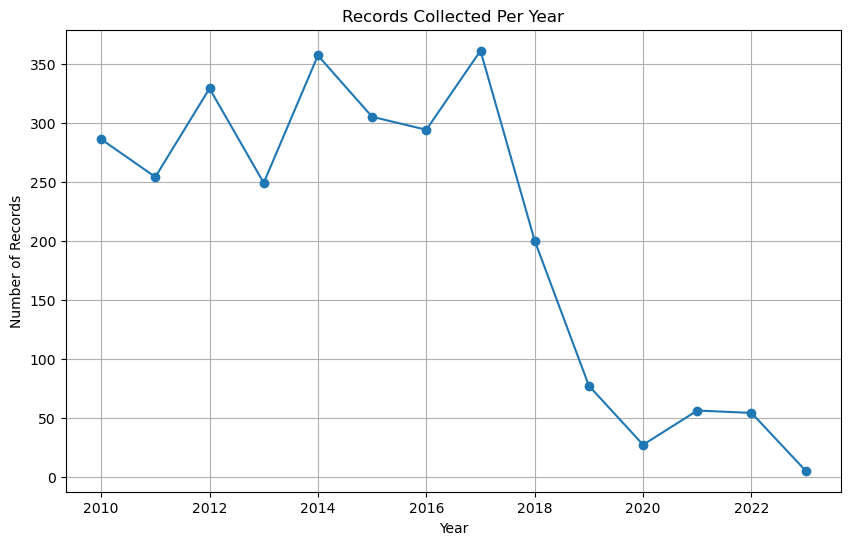

In [49]:
yearly_counts = filtered_do_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Records Collected Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

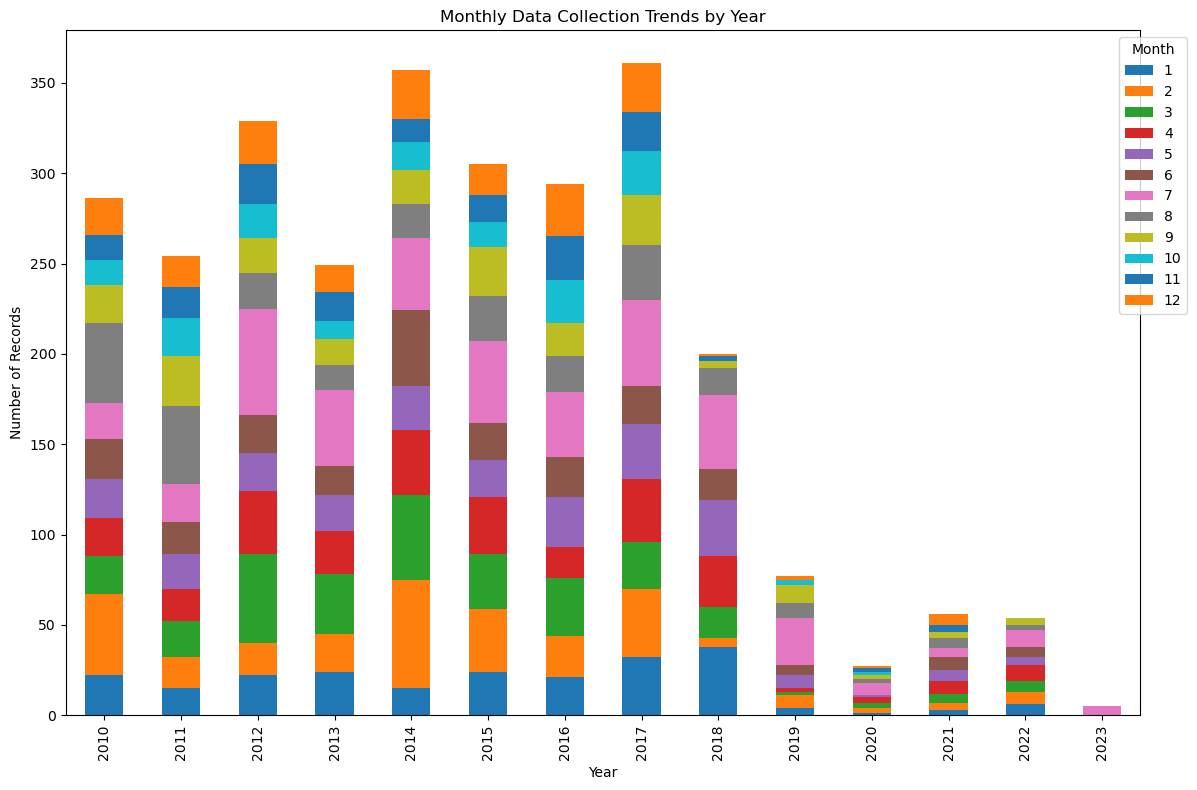

In [50]:
monthly_counts = filtered_do_df.groupby(['Year', 'Month']).size().unstack()
monthly_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Monthly Data Collection Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

---

## <a id="forecasting-modeling"></a>Section 7: Forecasting and Prediction Modeling

---

### <a id="core-prediction"></a>Subsection 7.1: Core Prediction Question

---

### <a id="supporting-prediction"></a>Subsection 7.2: Supporting Question

#### <a id="part-1-missing-value-imputation-interpolation"></a>Part 1: Missing Value Imputation/Interpolation

In [51]:
# Inspect unique values in 'CharacteristicName' after cleaning
filtered_do_df.head()

,ActivityIdentifier,Dissolved oxygen (DO),Nitrate,"Temperature, water",Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure,Year,Month,Day,Weekday,Hour
0,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F^01,10.04,NaN,10.50,NaN,6.98,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032,2010,1,20,2,0
3,11NPSWRD_WQX-PRSF_WQ_DF1_20100218_F^01,10.01,NaN,13.25,NaN,7.38,PRSF_WQ,2010-02-18,NaN,-122.47117,37.80032,2010,2,18,3,0
6,11NPSWRD_WQX-PRSF_WQ_DF1_20100317_F/1,10.00,NaN,13.25,NaN,7.30,PRSF_WQ,2010-03-17,11:35:00,-122.47117,37.80032,2010,3,17,2,0
8,11NPSWRD_WQX-PRSF_WQ_DF1_20100317_F^01,9.99,NaN,13.25,NaN,7.29,PRSF_WQ,2010-03-17,11:35:00,-122.47117,37.80032,2010,3,17,2,0
12,11NPSWRD_WQX-PRSF_WQ_DF1_20100422_F^01,9.69,NaN,13.08,NaN,6.80,PRSF_WQ,2010-04-22,11:05:00,-122.47117,37.80032,2010,4,22,3,0


In [69]:
filtered_do_df['Nitrate']

3       NaN
6       NaN
8       NaN
12      NaN
15      NaN
         ..
15253   NaN
15256   NaN
15259   NaN
15262   NaN
15265   NaN
Name: Nitrate, Length: 2616, dtype: float64

In [84]:
filtered_do_df.loc[:, 'Temperature, water'] = filtered_do_df['Temperature, water'].fillna(
    filtered_do_df['Temperature, water'].mean()
)

filtered_do_df.loc[:, 'Nitrate'] = filtered_do_df['Nitrate'].fillna(np.median(do_pivoted_df_final.dropna(subset=["Nitrate"])["Nitrate"]))
filtered_do_df.loc[:, 'Turbidity'] = filtered_do_df['Turbidity'].fillna(filtered_do_df['Turbidity'].median())
filtered_do_df.loc[:, 'pH'] = filtered_do_df['pH'].fillna(filtered_do_df['pH'].median())
filtered_do_df = filtered_do_df.drop("ActivityStartTime/Time_PST", axis=1)

KNN Imputing DO since it's time dependent and prediction target variable so important

In [85]:
knn_imputer = KNNImputer(n_neighbors=5)
imputed_values = knn_imputer.fit_transform(filtered_do_df[['Temperature, water', 'Turbidity', 'pH', 'Nitrate']])
filtered_do_df.loc[:, 'Dissolved oxygen (DO)'] = imputed_values[:, 0]  # Assuming the imputed values are for the first column

In [86]:
print(filtered_do_df.isnull().sum())

ActivityIdentifier       0
Dissolved oxygen (DO)    0
Nitrate                  0
Temperature, water       0
Turbidity                0
pH                       0
ProjectIdentifier        0
ActivityStartDate        0
LongitudeMeasure         0
LatitudeMeasure          0
Year                     0
Month                    0
Day                      0
Weekday                  0
Hour                     0
DO_lag1                  0
Temp_lag1                0
Turb_lag1                0
pH_lag1                  0
dtype: int64


In [88]:
features = ['Temperature, water', 'Turbidity', 'pH', 'Year', 'Month', 'Nitrate']
target = 'Dissolved oxygen (DO)'

filtered_do_df.loc[:, 'DO_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])[target].shift(1)
filtered_do_df.loc[:, 'Temp_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Temperature, water'].shift(1)
filtered_do_df.loc[:, 'Turb_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['Turbidity'].shift(1)
filtered_do_df.loc[:, 'pH_lag1'] = filtered_do_df.groupby(["LongitudeMeasure", "LatitudeMeasure"])['pH'].shift(1)

In [89]:
filtered_do_df = filtered_do_df.dropna(subset=['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1'])

#### <a id="part-2-train-test-split"></a>Part 2: Train-Test Split

In [91]:
X = filtered_do_df[features + ['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1']]
y = filtered_do_df[target]
# Train-test split (e.g., 80% for training, 20% for testing)
train_size = int(len(filtered_do_df) * 0.8)
train_data, test_data = filtered_do_df[:train_size], filtered_do_df[train_size:]

In [92]:
X_train, X_test = train_data[features + ['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1']], test_data[features + ['DO_lag1', 'Temp_lag1', 'Turb_lag1', 'pH_lag1']]
y_train, y_test = train_data[target], test_data[target]

#### <a id="part-3-models"></a>Part 3: Models

##### <a id="model-1-linear-regression"></a>Model 1: Linear Regression

In [93]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

##### <a id="model-2-xgboost"></a>Model 2: XGBoost

In [95]:
# Model 2: Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

##### <a id="model-3-random-forest"></a>Model 3: Random Forest

In [96]:
# Model 3: XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)

#### <a id="part-4-evaluation-visualization"></a>Part 4: Evaluation & Visualization

In [97]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

In [98]:
print("Linear Regression Evaluation:")
print(evaluate_model(y_test, y_pred_lin_reg))

print("Random Forest Evaluation:")
print(evaluate_model(y_test, y_pred_rf))

print("XGBoost Evaluation:")
print(evaluate_model(y_test, y_pred_xgb))

Linear Regression Evaluation:
(3.671617889145751e-15, 3.1087200135159875e-29, 1.0)
Random Forest Evaluation:
(0.011934931261887152, 0.0064217356226579985, 0.9984448653549047)
XGBoost Evaluation:
(0.04008330789620282, 0.07728837764987818, 0.9812832790371421)


Visualize Models

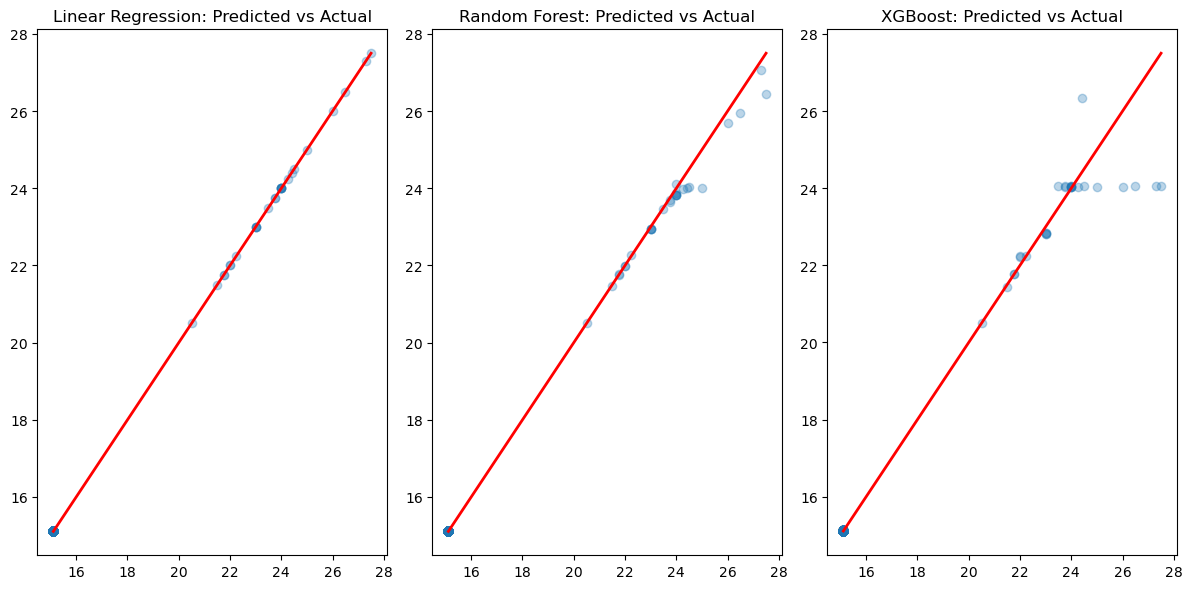

In [99]:
linear_pred = lin_reg.predict(X_test)
rf_pred = rf_regressor.predict(X_test)
xgb_pred = xgb_regressor.predict(X_test)

plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Regression: Predicted vs Actual')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Random Forest: Predicted vs Actual')

# XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test, xgb_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('XGBoost: Predicted vs Actual')

plt.tight_layout()
plt.show()

---

### <a id="temporal-prediction"></a>Subsection 7.3: Temporal Prediction Question

---

## <a id="conclusions"></a>Section 8: Interpretation and Conclusions

---

## <a id="references"></a>Section 9: Words Cited

---